# Problems with Cross-Validation

### Introduction

In the last lesson, we learned about how we can use cross-validation to train our model on multiple different validation set, to then choose the best version of our model.  In this lesson, we'll point out how cross-validation can be problematic.

### Reviewing Cross Validation

Remember that with cross-validation we split our data into k number of folds.  And then we train our model on all but one of the folds, and evaluate the model on the remaining folds.  We rotate through our data, with a different fold of the data serving as the holdout set each time.

<img src="./k-fold-split-data.png" width="40%">

Now remember when we initially discussed separating our data into training, validation and test sets.  In choosing how to split the data, one issue that we brought up, was sequentially ordering our splits of the data, so that we are always evaluating how our model performs on future data.

<img src="./train-val-split.png" width="60%">

With K-fold cross-validation we no longer only validating on future data.

In [29]:
import pandas as pd
from sklearn.model_selection import KFold

df = pd.read_csv('./imdb_movies.csv').sort_values('year')

X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]
kf = KFold(n_splits = 10) 
splits = list(kf.split(X))

In [30]:
# change the split number to rotate through the data

split_num = 1
split = splits[split_num]
train_idcs = split[0]
validate_idcs = split[1]

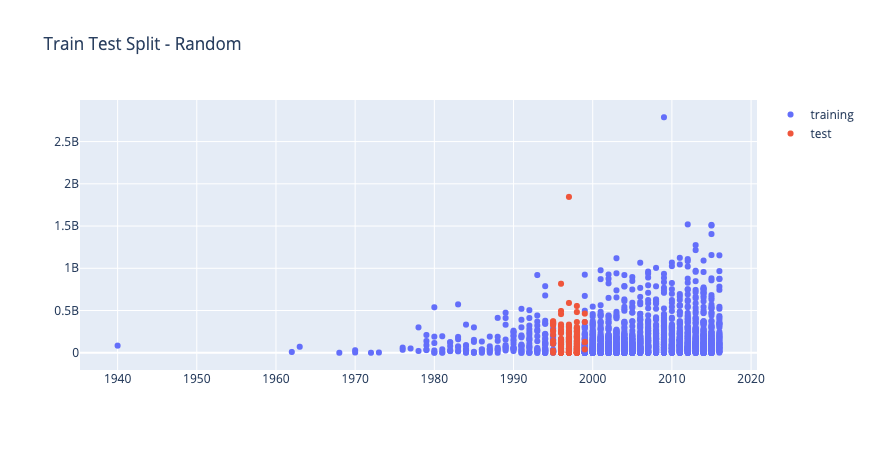

In [31]:
import plotly.graph_objects as go
train_scatter = go.Scatter(x = X['year'].iloc[train_idcs], y = y.iloc[train_idcs], mode = 'markers', name = 'training')
test_scatter = go.Scatter(x = X['year'].iloc[validate_idcs], y = y.iloc[validate_idcs], mode = 'markers', name = 'test')
go.Figure(data = [train_scatter, test_scatter], layout = {'title': 'Train Test Split - Random '})

Instead, because we take turns with what fold will be our holdout, we will be evaluating our model on past data.  This means, that we may underweight the importance of parameters that predict future data.

### A Potential Solution

One potential option is to use the TimeSeriesSplit.  The TimeSeriesSplit uses a sliding window to choose it's validation set.  Let's see it in action.

In [33]:
from sklearn.model_selection import TimeSeriesSplit
ts = TimeSeriesSplit(n_splits = 10) 
splits = list(ts.split(X))

In [38]:
# change the split number to rotate through the data

split_num = 0
split = splits[split_num]
train_idcs = split[0]
validate_idcs = split[1]

We can see that in the first split it takes all of the data through 1997, and leaves data up through 2000 as the validation data.

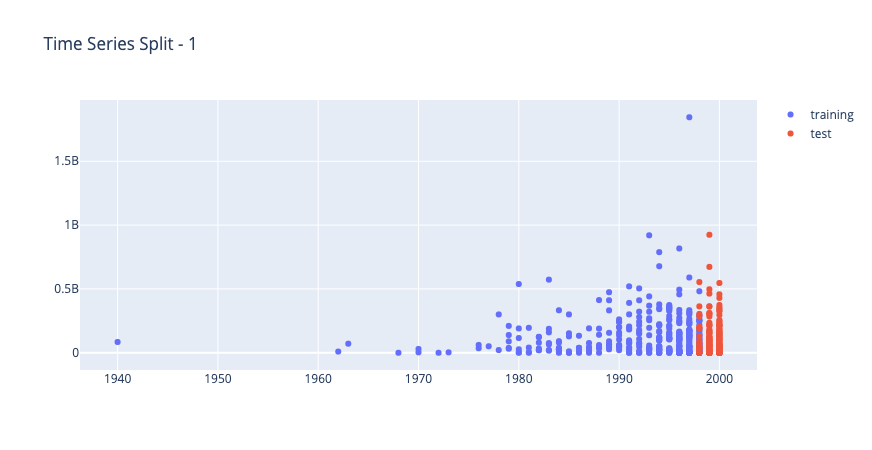

In [42]:
import plotly.graph_objects as go
train_scatter = go.Scatter(x = X['year'].iloc[train_idcs], y = y.iloc[train_idcs], mode = 'markers', name = 'training')
test_scatter = go.Scatter(x = X['year'].iloc[validate_idcs], y = y.iloc[validate_idcs], mode = 'markers', name = 'test')
go.Figure(data = [train_scatter, test_scatter], layout = {'title': 'Time Series Split - 1 '})

In [46]:
split_num = 2
split = splits[split_num]
train_idcs = split[0]
validate_idcs = split[1]

Then in the subsequent splits, it moves the window forward. 

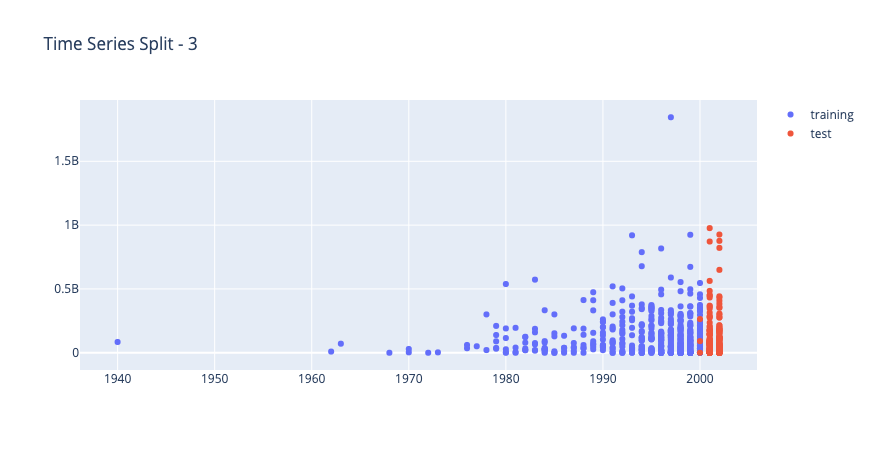

In [49]:
import plotly.graph_objects as go
train_scatter = go.Scatter(x = X['year'].iloc[train_idcs], y = y.iloc[train_idcs], mode = 'markers', name = 'training')
test_scatter = go.Scatter(x = X['year'].iloc[validate_idcs], y = y.iloc[validate_idcs], mode = 'markers', name = 'test')
go.Figure(data = [train_scatter, test_scatter], layout = {'title': 'Time Series Split - 3 '})

So here our model is repeatedly given the task of predicting the future data, but what that future data is slides forward each time.

### Summary

In this lesson, we 